
* In this data:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not


##### Applied Models:


* Linear Regression
* KNN
* Logistic Regression
* Decision tree
* Random forest

## Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
dataset=pd.read_csv('train.csv')

In [9]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Analysis

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

## Data Visualization & Analysis

In [ ]:
sns.pairplot(dataset,hue='price_range')

### How does ram is affected by price

In [ ]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

### Internal Memory vs Price Range

In [ ]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

### % of Phones which support 3G

In [ ]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()


### % of Phones which support 4G


In [ ]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Battery power vs Price Range

In [ ]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

### No of Phones vs Camera megapixels of front and primary camera

In [ ]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Mobile Weght vs Price range

In [ ]:
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');

### Talk time vs Price range

In [ ]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

## X & Y array

In [11]:
X=dataset.drop('price_range',axis=1)

In [12]:
y=dataset['price_range']

## Splitting the data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Creating & Training Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
lm.score(X_test,y_test)

0.9132801488185276

## Creating & Training KNN Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [19]:
knn.score(X_test,y_test)

0.9212121212121213

### Elbow Method For optimum value of K

In [20]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

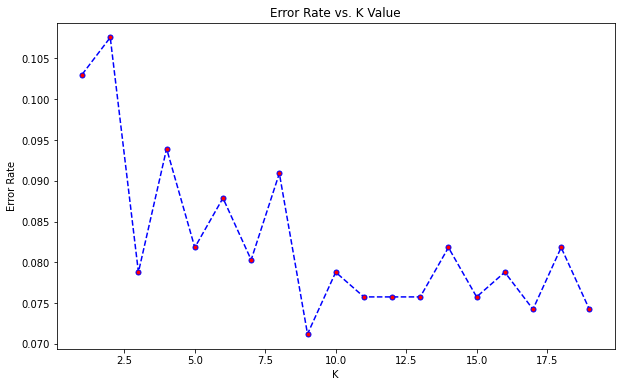

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Creating & Training Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()


In [23]:
logmodel.fit(X_train,y_train)

d:\github\csgo round prediction\csgoenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
logmodel.score(X_test,y_test)

0.6181818181818182

## Creating & Training Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
dtree.score(X_test,y_test)

0.8272727272727273

## Tree Visualization

In [28]:
feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

In [29]:
#For tree Visualization as kaggle does't support pydotplus just install the pydotplus in your systems's conda terminal
'''
import pydotplus as pydot

from IPython.display import Image

from sklearn.externals.six import StringIO

dot_data = StringIO()

tree.export_graphviz(dtree, out_file=dot_data,feature_names=feature_names)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())'''

'\nimport pydotplus as pydot\n\nfrom IPython.display import Image\n\nfrom sklearn.externals.six import StringIO\n\ndot_data = StringIO()\n\ntree.export_graphviz(dtree, out_file=dot_data,feature_names=feature_names)\n\ngraph = pydot.graph_from_dot_data(dot_data.getvalue())\n\nImage(graph.create_png())'

In [30]:
#Another way
'''from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())'''  

'from IPython.display import Image  \nfrom sklearn.externals.six import StringIO  \nfrom sklearn.tree import export_graphviz\nimport pydot \nimport os\nos.environ["PATH"] += os.pathsep + \'C:/Program Files (x86)/Graphviz2.38/bin/\'\ndot_data = StringIO()  \nexport_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)\n\ngraph = pydot.graph_from_dot_data(dot_data.getvalue())  \nImage(graph[0].create_png())'

## Creating & Training Random Tree Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [32]:
rfc.score(X_test,y_test)

0.8757575757575757

# Conclusion: KNN & Linear Regression performed the best

## RESULT : Linear Regression

In [33]:
y_pred=lm.predict(X_test)


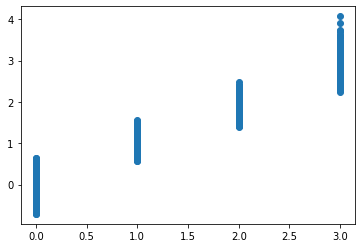

In [34]:
plt.scatter(y_test,y_pred)


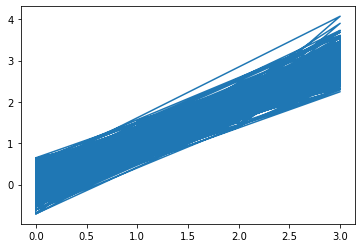

In [35]:
plt.plot(y_test,y_pred)

## RESULT: KNN

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
pred = knn.predict(X_test)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.93       151

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [39]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 170  12]
 [  0   0  10 141]]


<AxesSubplot:>

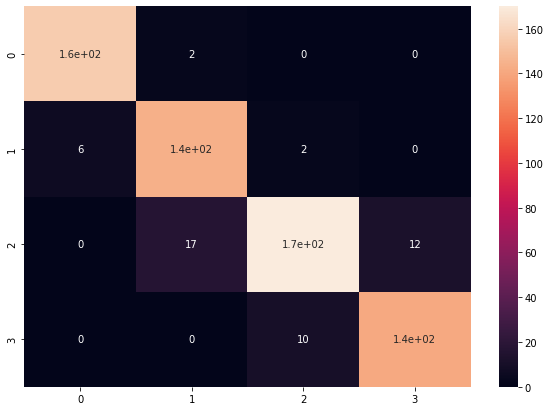

In [40]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)


# Price prediction of Test.csv Using KNN for Prediction

### Import test.csv

In [41]:
data_test=pd.read_csv('test.csv')

In [42]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [43]:
data_test=data_test.drop('id',axis=1)

In [44]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


# Model

In [45]:
predicted_price=knn.predict(data_test)

# Predicted Price Range

In [46]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

# Adding Predicted price to test.csv

In [47]:
data_test['price_range']=predicted_price

In [48]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


In [50]:
data_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
import pickle
pickle.dump(knn, open('./model.sav', 'wb'))